 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_csv_path = Path("../Starter_Code/Resources/whale_returns.csv")

In [3]:
# Reading whale returns

whale_df = pd.read_csv(whale_csv_path)
whale_df.sort_values("Date")

whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)

In [4]:
#remove the date column
whale_df.drop(columns=['Date'], inplace=True)


whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whale_df.dropna(inplace=True)

In [7]:
# Count nulls second time to check
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [8]:
# Reading algorithmic returns
algorithmic_csv_path = Path("../Starter_Code/Resources/algo_returns.csv")

algorithmic_df = pd.read_csv(algorithmic_csv_path)
algorithmic_df.sort_values("Date")

algorithmic_df.set_index(pd.to_datetime(algorithmic_df['Date'], infer_datetime_format=True), inplace=True)

In [9]:
#remove the 'Date' Column
algorithmic_df.drop(columns=['Date'], inplace=True)


algorithmic_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [10]:
# Count nulls
algorithmic_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algorithmic_df.dropna(inplace=True)

In [12]:
# Count nulls second time to check
algorithmic_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_csv_path = Path("../Starter_Code/Resources/sp_tsx_history.csv")

sp_tsx_df = pd.read_csv(sp_tsx_csv_path)
sp_tsx_df.sort_values("Date")

sp_tsx_df.set_index(pd.to_datetime(sp_tsx_df['Date'], infer_datetime_format=True), inplace=True)

In [14]:
# Remove the 'Date' Column
sp_tsx_df.drop(columns=['Date'], inplace=True)


sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [15]:
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace('$', '')
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(',', '')
sp_tsx_df.head()


C:\Users\alexs\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [16]:
# Fix Data Types (Close)
sp_tsx_df["Close"] = sp_tsx_df['Close'].astype(float)


In [17]:
# Check Data Types
sp_tsx_df.dtypes

Close    float64
dtype: object

In [18]:
# Calculate Daily Returns
daily_returns = sp_tsx_df.pct_change(1)
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [19]:
# Drop nulls
daily_returns.dropna(inplace=True)
daily_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [20]:
# Column Names
daily_returns.columns

Index(['Close'], dtype='object')

In [21]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["SP TSX CLOSE"]
daily_returns.columns = columns
daily_returns.head()

,SP TSX CLOSE
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [22]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_Portfolio_df = pd.concat([daily_returns, algorithmic_df , whale_df], axis="columns", join="inner")
combined_Portfolio_df.head()

,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


In [23]:
# Sort the combined DF
combined_Portfolio_df.sort_index(inplace=True)
combined_Portfolio_df

,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.003371,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001344,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.009972,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.006555,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-25,-0.000628,0.000682,-0.007247,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.002254,0.002981,0.005256,0.008149,0.009162,0.012355,0.010434
2019-04-29,-0.000788,0.005208,0.002829,0.001254,0.002719,0.006251,0.005223


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

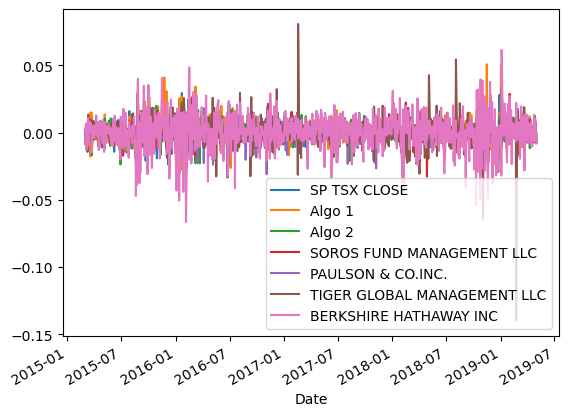

In [24]:
# Plot daily returns of all portfolios
portfolio_returns = combined_Portfolio_df
portfolio_returns.plot() 

<AxesSubplot:xlabel='Date'>

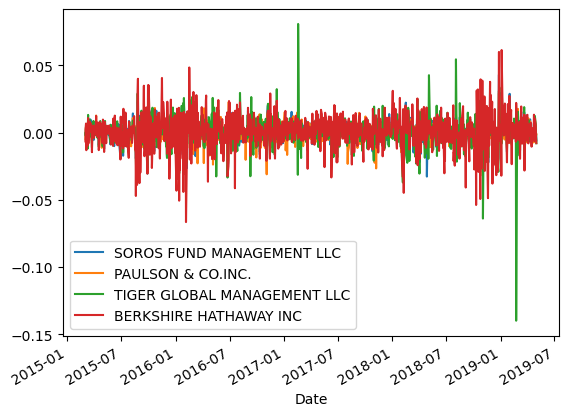

In [25]:
# Plot daily returns for whale portfolio
whale_returns = whale_df
whale_returns.plot() 


#### Calculate and Plot cumulative returns.

In [26]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + portfolio_returns).cumprod() - 1
cumulative_returns

,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.008530,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.011872,-0.010514,0.001464,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,-0.010544,-0.011459,0.005794,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.020411,-0.016359,-0.005733,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.026832,-0.021717,-0.004437,-0.002383,0.002951,-0.003367,-0.010466
...,...,...,...,...,...,...,...
2019-04-25,0.070504,1.011144,0.196390,0.118163,-0.245179,-0.159728,0.348932
2019-04-26,0.072916,1.017139,0.202677,0.127275,-0.238264,-0.149346,0.363007
2019-04-29,0.072071,1.027645,0.206080,0.128689,-0.236192,-0.144029,0.370126


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

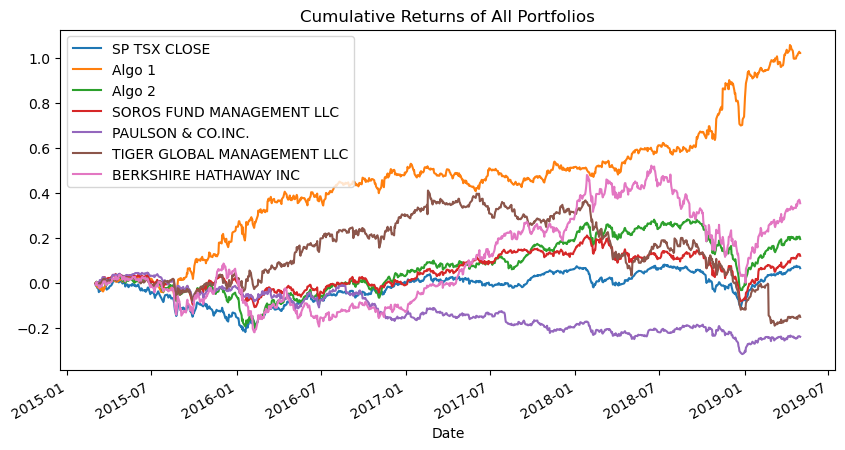

In [27]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of All Portfolios") 

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


### Calculate Standard Deviations

<AxesSubplot:>

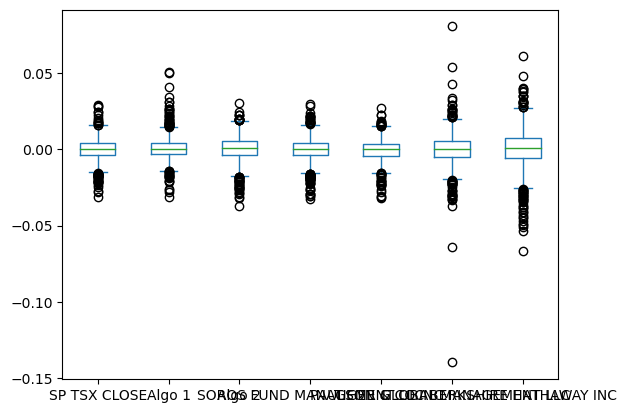

In [28]:
combined_Portfolio_df.plot.box()


In [29]:
# Calculate the daily standard deviations of all portfolios
# Find Mean
print(combined_Portfolio_df.mean())

SP TSX CLOSE                   0.000087
Algo 1                         0.000713
Algo 2                         0.000208
SOROS FUND MANAGEMENT LLC      0.000141
PAULSON & CO.INC.             -0.000241
TIGER GLOBAL MANAGEMENT LLC   -0.000099
BERKSHIRE HATHAWAY INC         0.000377
dtype: float64


In [30]:
# finding the Standard deviation
print(combined_Portfolio_df.std())

SP TSX CLOSE                   0.007034
Algo 1                         0.007589
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64


In [31]:
# Determine which portfolios are riskier than the S&P TSX 60
combined_Portfolio_df['SP TSX CLOSE'].std()

0.007034167748577725

In [32]:
(combined_Portfolio_df.std())>combined_Portfolio_df['SP TSX CLOSE'].std()

SP TSX CLOSE                   False
Algo 1                          True
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

<AxesSubplot:xlabel='Date'>

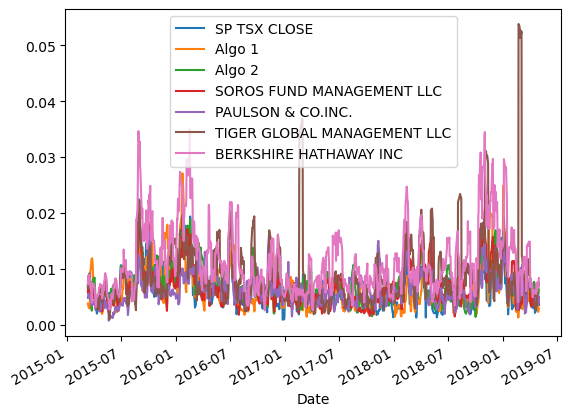

In [33]:
# Plot Standard Deviation
combined_Portfolio_df.rolling(window=7).std().plot()

### Determine which portfolios are riskier than the S&P TSX 60

In [34]:
# Calculate  the daily standard deviation of S&P TSX 60
print(daily_returns.std())

SP TSX CLOSE    0.006637
dtype: float64


<AxesSubplot:xlabel='Date'>

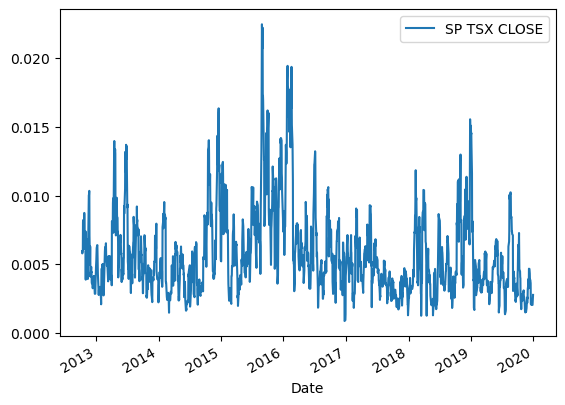

In [35]:
daily_returns.rolling(window=7).std().plot()

In [36]:
#Volatility of the Portfolios. Volatility determines risk.
Whale_volatility = whale_returns.std() * np.sqrt(252)

# Whale_volatility = whale_returns.sort_values()
Whale_volatility

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [37]:
#Volatility of the S&P TSX 60. Volatility determines risk.
volatility = sp_tsx_df.std() * np.sqrt(252)
volatility

Close    21086.70589
dtype: float64

In [38]:
# Calculate the annualized standard deviation (252 trading days)
Whale_volatility = whale_returns.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [90]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
print(whale_df.rolling(window=21).std())

#remove nulls
whale_df.dropna(inplace=True)
whale_df.head()

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-25                   0.004145            0.005572   
2019-04-26                   0.004117            0.005649   
2019-04-29                   0.004123            0.005374   
2019-04-30                   0.004199            0.005408   
2019-05-01                   0.004271            0.005009   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                          NaN                     NaN  
2015-03-

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


<AxesSubplot:xlabel='Date'>

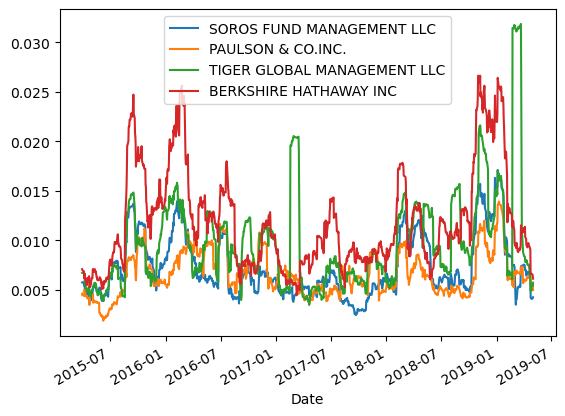

In [40]:
# Plot the rolling standard deviation
whale_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [41]:
# Calculate the correlation
whale_correlation = whale_df.corr()
# Display de correlation matrix
whale_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,1.000000,0.700181,0.561745,0.754308
PAULSON & CO.INC.,0.700181,1.000000,0.435333,0.545802
TIGER GLOBAL MANAGEMENT LLC,0.561745,0.435333,1.000000,0.425102
BERKSHIRE HATHAWAY INC,0.754308,0.545802,0.425102,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [42]:
# Calculate covariance of a single portfolio

covariance = daily_returns['portfolio_returns'].cov(daily_returns['SOROS FUND MANAGEMENT LLC'])
covariance

KeyError: 'portfolio_returns'

In [ ]:
# Calculate variance of S&P TSX

variance = daily_returns['SP TSX CLOSE'].var()
variance

In [ ]:
# Computing beta

# Plot beta trend

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [57]:
# Reading data from 1st stock
otex_data = Path("../Starter_Code/Resources/otex_historical.csv")
otex = pd.read_csv(
    otex_data, index_col = 'Date', infer_datetime_format=True, parse_dates=True) 
otex=otex.sort_index()

            
# Rename Columns to be specific to this portfolio.
columns = ["OTEX Symbol", "OTEX Close"]
otex.columns = columns
otex.head()

,OTEX Symbol,OTEX Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [72]:
# Reading data from 2nd stock
shop_data = Path("../Starter_Code/Resources/shop_historical.csv")
shop = pd.read_csv(
    shop_data, index_col = 'Date', infer_datetime_format=True, parse_dates=True) 
shop = shop.sort_index()
shop.head()



# Rename Columns to be specific to this portfolio.
columns = ["SHOP Symbol", "SHOP Close"]
shop.columns = columns
shop.head()

,SHOP Symbol,SHOP Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [59]:
# Reading data from 3rd stock
L_data = Path("../Starter_Code/Resources/l_historical.csv")
L = pd.read_csv(
    L_data, index_col = 'Date', infer_datetime_format=True, parse_dates=True) 
L = L.sort_index()
L.head()

# Rename Columns to be specific to this portfolio.
columns = ["L Symbol", "L Close"]
L.columns = columns
L.head()

,L Symbol,L Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [60]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([otex, shop , L], axis="columns", join="inner")
combined_stocks_df.head()

,OTEX Symbol,OTEX Close,SHOP Symbol,SHOP Close,L Symbol,L Close
Date,,,,,,
2018-01-02,OTEX,43.58,SHOP,132.06,L,57.99
2018-01-03,OTEX,43.07,SHOP,135.15,L,57.41
2018-01-04,OTEX,42.91,SHOP,137.46,L,57.42
2018-01-05,OTEX,42.57,SHOP,137.26,L,57.42
2018-01-08,OTEX,42.16,SHOP,139.51,L,56.86


In [ ]:
# Reset Date index


In [62]:
# Reorganize portfolio data by having a column per symbol

combined_stocks_df.drop(columns=['OTEX Symbol', 'SHOP Symbol', 'L Symbol'], inplace=True)

combined_stocks_df.head()

,OTEX Close,SHOP Close,L Close
Date,,,
2018-01-02,43.58,132.06,57.99
2018-01-03,43.07,135.15,57.41
2018-01-04,42.91,137.46,57.42
2018-01-05,42.57,137.26,57.42
2018-01-08,42.16,139.51,56.86


In [63]:
# Calculate daily returns
combined_stocks_df = combined_stocks_df.pct_change()
combined_stocks_df.head()

,OTEX Close,SHOP Close,L Close
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753


In [66]:
# Drop NAs
combined_stocks_df.dropna(inplace=True)

# Display sample data
combined_stocks_df.head()

,OTEX Close,SHOP Close,L Close
Date,,,
2018-01-03,-0.011703,0.023398,-0.010002
2018-01-04,-0.003715,0.017092,0.000174
2018-01-05,-0.007924,-0.001455,0.000000
2018-01-08,-0.009631,0.016392,-0.009753
2018-01-09,-0.000712,-0.011254,0.008969


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [75]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_returns = combined_stocks_df.dot(weights)


# Display sample data
stock_returns.head()

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [77]:
# Join your returns DataFrame to the original returns DataFrame


New_Portfolio_df = pd.concat([combined_Portfolio_df, combined_stocks_df], axis="columns", join="inner")
New_Portfolio_df.head()

,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,OTEX Close,SHOP Close,L Close
Date,,,,,,,,,,
2018-01-03,0.003774,-0.000890,0.008175,0.004658,0.000027,0.001979,0.005676,-0.011703,0.023398,-0.010002
2018-01-04,0.002528,-0.000914,0.004294,-0.000914,0.004196,0.010743,0.004065,-0.003715,0.017092,0.000174
2018-01-05,-0.003869,-0.003839,0.006405,0.004072,0.000823,0.000737,0.022023,-0.007924,-0.001455,0.000000
2018-01-08,-0.001944,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435,-0.009631,0.016392,-0.009753
2018-01-09,0.000097,-0.001004,-0.002091,-0.001028,0.000872,0.001789,0.000708,-0.000712,-0.011254,0.008969


In [79]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

New_Portfolio_df.dropna(inplace=True)

New_Portfolio_df.head()

,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,OTEX Close,SHOP Close,L Close
Date,,,,,,,,,,
2018-01-03,0.003774,-0.000890,0.008175,0.004658,0.000027,0.001979,0.005676,-0.011703,0.023398,-0.010002
2018-01-04,0.002528,-0.000914,0.004294,-0.000914,0.004196,0.010743,0.004065,-0.003715,0.017092,0.000174
2018-01-05,-0.003869,-0.003839,0.006405,0.004072,0.000823,0.000737,0.022023,-0.007924,-0.001455,0.000000
2018-01-08,-0.001944,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435,-0.009631,0.016392,-0.009753
2018-01-09,0.000097,-0.001004,-0.002091,-0.001028,0.000872,0.001789,0.000708,-0.000712,-0.011254,0.008969


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [86]:
# Calculate the annualized `std`
New_Volatility = New_Portfolio_df.std() * np.sqrt(252)
New_Volatility

SP TSX CLOSE                   0.099121
Algo 1                         0.120028
Algo 2                         0.137664
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
OTEX Close                     0.225703
SHOP Close                     0.504079
L Close                        0.162907
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [89]:
# Calculate rolling standard deviation
New_Portfolio_df.rolling(window=21).std()
New_Portfolio_df.head()

,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,OTEX Close,SHOP Close,L Close
Date,,,,,,,,,,
2018-01-03,0.003774,-0.000890,0.008175,0.004658,0.000027,0.001979,0.005676,-0.011703,0.023398,-0.010002
2018-01-04,0.002528,-0.000914,0.004294,-0.000914,0.004196,0.010743,0.004065,-0.003715,0.017092,0.000174
2018-01-05,-0.003869,-0.003839,0.006405,0.004072,0.000823,0.000737,0.022023,-0.007924,-0.001455,0.000000
2018-01-08,-0.001944,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435,-0.009631,0.016392,-0.009753
2018-01-09,0.000097,-0.001004,-0.002091,-0.001028,0.000872,0.001789,0.000708,-0.000712,-0.011254,0.008969


<AxesSubplot:xlabel='Date'>

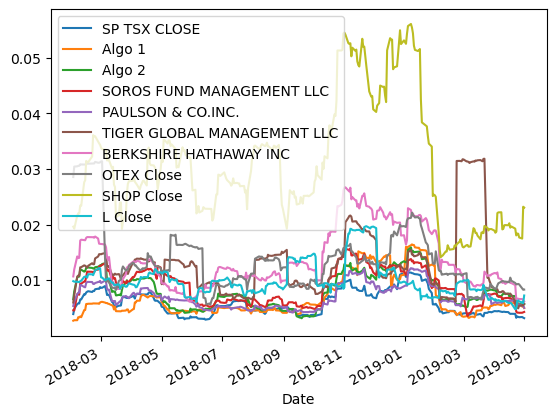

In [87]:
# Plot rolling standard deviation

New_Portfolio_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [91]:
# Calculate and plot the correlation

New_Correlation = New_Portfolio_df.corr()

# Display de correlation matrix

New_Correlation


,SP TSX CLOSE,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,OTEX Close,SHOP Close,L Close
SP TSX CLOSE,1.000000,0.284789,0.754326,0.686681,0.623728,0.438781,0.649817,0.450590,0.462264,0.338382
Algo 1,0.284789,1.000000,0.321837,0.305525,0.320568,0.130845,0.294696,0.108323,0.206226,0.099106
Algo 2,0.754326,0.321837,1.000000,0.834431,0.797494,0.485258,0.783254,0.426084,0.507364,0.168862
SOROS FUND MANAGEMENT LLC,0.686681,0.305525,0.834431,1.000000,0.764174,0.526710,0.782414,0.383971,0.508507,0.192009
PAULSON & CO.INC.,0.623728,0.320568,0.797494,0.764174,1.000000,0.536534,0.647407,0.320638,0.317837,0.164145
TIGER GLOBAL MANAGEMENT LLC,0.438781,0.130845,0.485258,0.526710,0.536534,1.000000,0.384316,0.250926,0.183726,0.339680
BERKSHIRE HATHAWAY INC,0.649817,0.294696,0.783254,0.782414,0.647407,0.384316,1.000000,0.413242,0.637107,0.130815
OTEX Close,0.450590,0.108323,0.426084,0.383971,0.320638,0.250926,0.413242,1.000000,0.395357,0.174320
SHOP Close,0.462264,0.206226,0.507364,0.508507,0.317837,0.183726,0.637107,0.395357,1.000000,0.113386
L Close,0.338382,0.099106,0.168862,0.192009,0.164145,0.339680,0.130815,0.174320,0.113386,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!